In [ ]:
import numpy as np

In [ ]:
n_datapoints=10
W = []*n_datapoints
b = []*n_datapoints
for i in range(n_datapoints+1):
    W.append([0,0])
    b.append([0,0])
W = np.array(W, dtype=np.float32)
b = np.array(b, dtype= np.float32)

In [ ]:
datapoints_x = np.array([[1,1], [2,-2], [-1,-1.5], [-2,-1], [-2,1], [1.5,-0.5]], dtype=np.float32)
datapoints_y = np.array([1, -1, -1, -1, 1, 1], dtype=np.float32)

In [ ]:
def sign_vector_product(v1, v2):
    product = sum(a * b for a, b in zip(v1, v2))
    return 1 if product > 0 else -1 if product < 0 else 1

In [ ]:
for i in range(len(datapoints_x)):
  y = sign_vector_product(W[i],datapoints_x[i])
  W[i+1] = W[i] + datapoints_y[i] * (datapoints_x[i]) * (y!=datapoints_y[i])
  b[i+1] = b[i] + datapoints_y[i] * (y!=datapoints_y[i])

In [ ]:
print('b',b)

b [[ 0.  0.]
 [ 0.  0.]
 [-1. -1.]
 [-1. -1.]
 [-2. -2.]
 [-2. -2.]
 [-1. -1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


In [ ]:
# New points to make the dataset non-linearly separable
new_points_x = np.array([[1.5, 1.5], [-1.5, 1], [-1, -1], [1, -1]], dtype=np.float32)
new_points_y = np.array([-1, 1, -1, 1], dtype=np.float32)

# Combine original and new points
datapoints_x = np.vstack((datapoints_x, new_points_x))
datapoints_y = np.concatenate((datapoints_y, new_points_y))

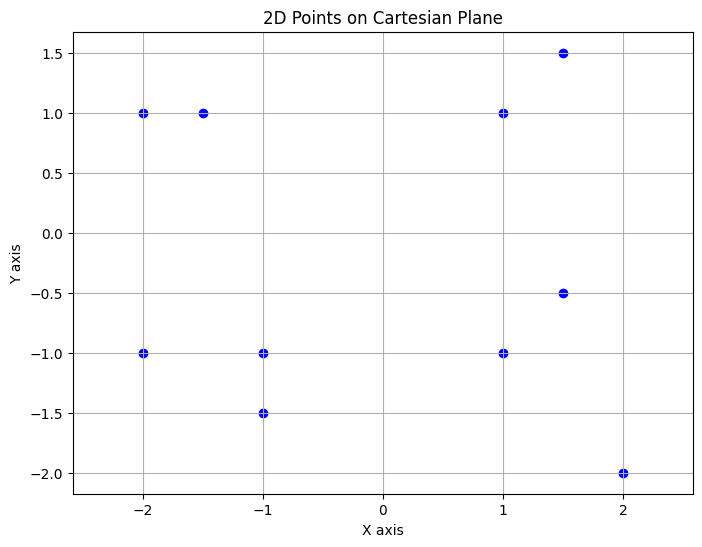

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_points(points):
    # Separate x and y coordinates
    x = [point[0] for point in points]
    y = [point[1] for point in points]

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue')

    # Add labels and title
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.title('2D Points on Cartesian Plane')

    # Add grid
    plt.grid(True)

    # Set equal scaling (so circles look circular)
    plt.axis('equal')

    # Show the plot
    plt.show()

plot_2d_points(datapoints_x)

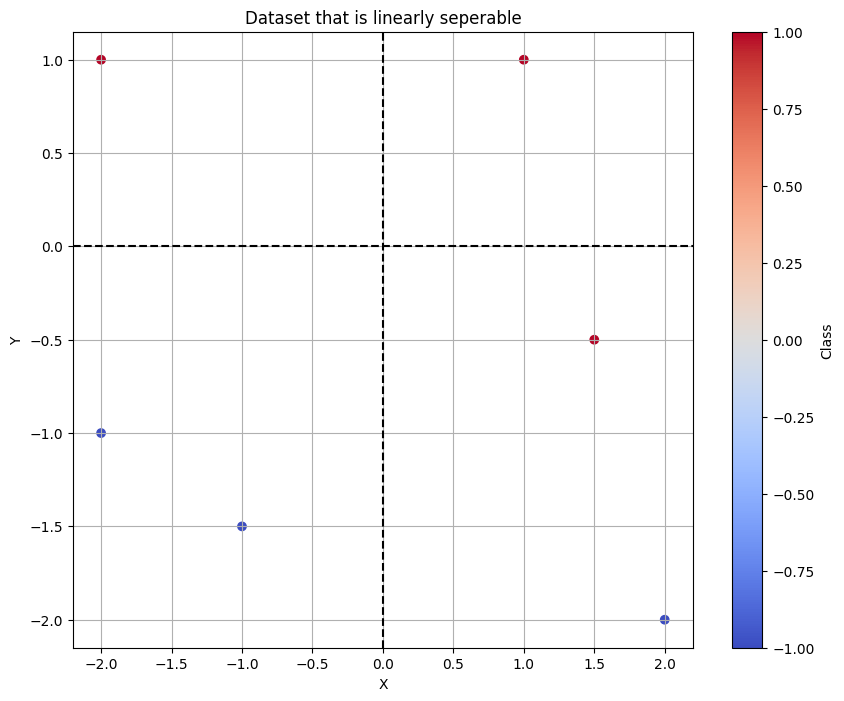

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(datapoints_x[:, 0], datapoints_x[:, 1], c=datapoints_y, cmap='coolwarm')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset that is linearly seperable')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

In [ ]:
for i in range(len(datapoints)):
  y = sign_vector_product(W[i],datapoints_x[i])
  W[i+1] = W[i] + datapoints_y[i] * (datapoints_x[i]) * (y!=datapoints_y[i])
  b[i+1] = b[i] + datapoints_y[i] * (y!=datapoints_y[i])

NameError: name 'datapoints' is not defined

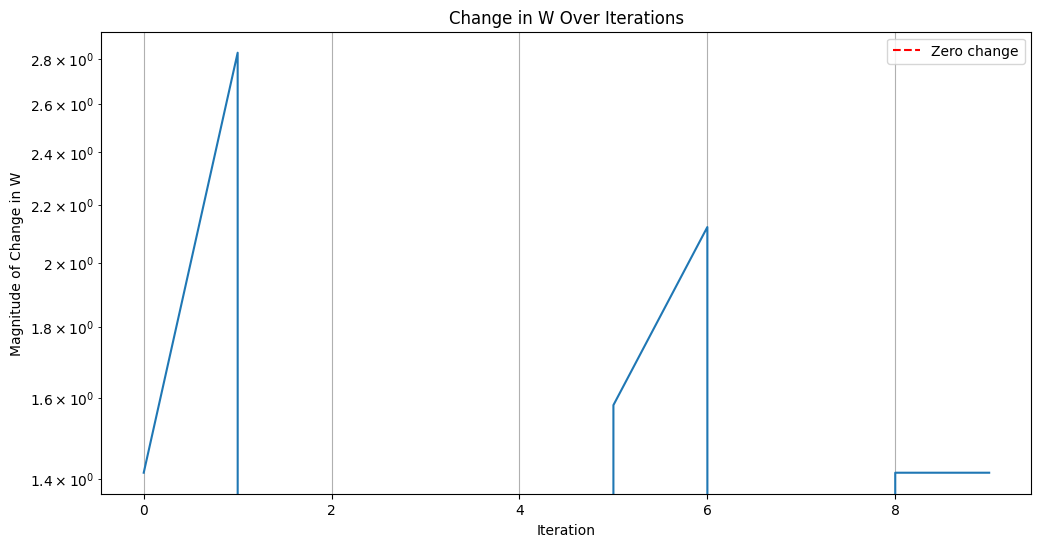

Max change: 2.8284270763397217
Min non-zero change: 1.4142135381698608
Mean change: 1.0773526787757874
Number of zero changes: 4
Number of non-zero changes: 6


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
num_points=10

def sign_vector_product(v1, v2):
    product = np.dot(v1, v2)
    return 1 if product > 0 else -1 if product < 0 else 0

delta_W = np.zeros(10)

# Perform the iterations and calculate delta_W
for i in range(len(datapoints_x)):
    y = sign_vector_product(W[i], datapoints_x[i])
    W[i+1] = W[i] + datapoints_y[i] * datapoints_x[i] * (y != datapoints_y[i])
    delta_W[i] = np.linalg.norm(W[i+1] - W[i])  # Magnitude of change

# Create a plot of change in W over iterations
plt.figure(figsize=(12, 6))
plt.plot(range(num_points), delta_W)
plt.xlabel('Iteration')
plt.ylabel('Magnitude of Change in W')
plt.title('Change in W Over Iterations')
plt.grid(True)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='--', label='Zero change')

plt.legend()
plt.yscale('log')  # Use log scale for y-axis to better show small changes
plt.show()

# Print some statistics about the changes
print("Max change:", np.max(delta_W))
print("Min non-zero change:", np.min(delta_W[delta_W != 0]))
print("Mean change:", np.mean(delta_W))
print("Number of zero changes:", np.sum(delta_W == 0))
print("Number of non-zero changes:", np.sum(delta_W != 0))